**TITANIC SURVIVAL PREDICTION**



**IMPORT THE  NECESSARY PACKAGES WHICH IS USED TO PREDICT THE SURVIALS**

In [17]:

# Titanic Survival Prediction using Random Forest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
# Load dataset
df = pd.read_csv("taks 1/Titanic-Dataset.csv")


**DROP THE UNWANTED COLUMNS IN THE DATASET**

In [19]:
# Drop irrelevant columns
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

**HANDLING MISSING VALUES**


In [20]:
# Handle missing values (safe version without inplace)
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])


In [21]:
# Convert categorical to numeric
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

In [22]:
# Define features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**TRAIN THE MODEL BY USING RandomForestClassifier**

In [23]:
# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


Accuracy: 82.12%

Confusion Matrix:
 [[91 14]
 [18 56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



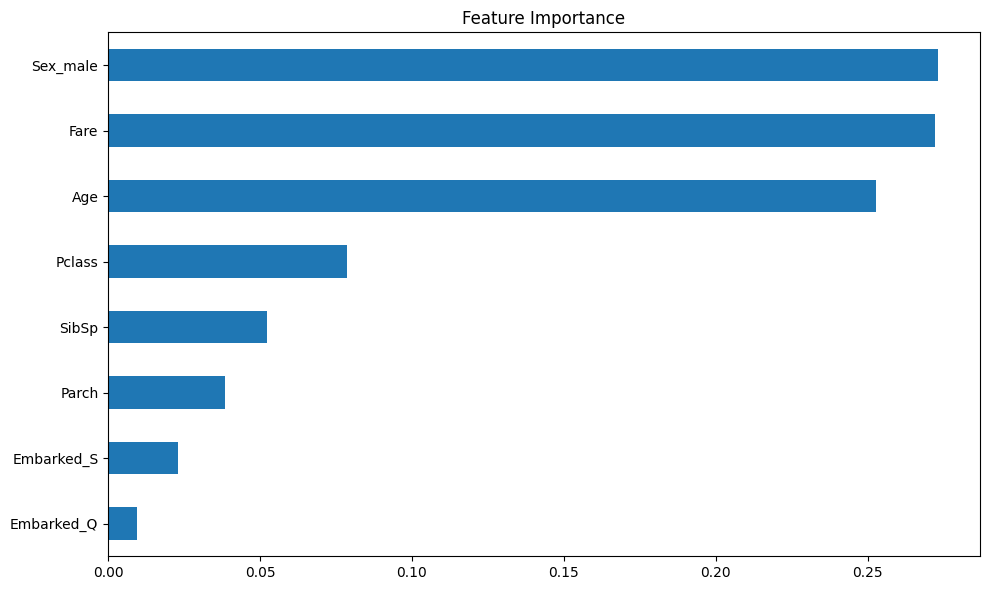

In [24]:
# Evaluation
print(f"\nAccuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6), title='Feature Importance')
plt.tight_layout()
plt.show()
